In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
df=pd.read_csv(r"C:\Users\samee\Desktop\traffic.csv")
df

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [5]:
df.shape

(226278, 9)

In [6]:
df.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [7]:
unique_events = df['event'].unique()
print(unique_events)

['click' 'preview' 'pageview']


In [8]:
df[df['country'].isnull()]

,event,date,country,city,artist,album,track,isrc,linkid
1407,click,2021-08-23,NaN,NaN,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
78711,preview,2021-08-23,NaN,NaN,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
88465,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3
104262,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3
128148,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3
130758,pageview,2021-08-24,NaN,NaN,Taylor Swift,1989 (Deluxe Edition),Blank Space,NaN,ce172030-cd80-556e-a20d-0fd85f6bb944
136569,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3
146096,pageview,2021-08-24,NaN,NaN,Taylor Swift,1989 (Deluxe Edition),Blank Space,NaN,ce172030-cd80-556e-a20d-0fd85f6bb944
150034,pageview,2021-08-23,NaN,NaN,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
201156,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3


In [9]:
df[df['city'].isnull()]

,event,date,country,city,artist,album,track,isrc,linkid
1407,click,2021-08-23,NaN,NaN,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
78711,preview,2021-08-23,NaN,NaN,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
88465,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3
104262,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3
128148,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3
130758,pageview,2021-08-24,NaN,NaN,Taylor Swift,1989 (Deluxe Edition),Blank Space,NaN,ce172030-cd80-556e-a20d-0fd85f6bb944
136569,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3
146096,pageview,2021-08-24,NaN,NaN,Taylor Swift,1989 (Deluxe Edition),Blank Space,NaN,ce172030-cd80-556e-a20d-0fd85f6bb944
150034,pageview,2021-08-23,NaN,NaN,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
201156,pageview,2021-08-24,NaN,NaN,Jhay Cortez,Nos Matamos,Nos Matamos,USUM72112523,38eb2b71-d8db-49bb-859b-ace93cf57ba3


In [10]:
df.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [11]:
df[df['artist'].isnull()] 

,event,date,country,city,artist,album,track,isrc,linkid
2095,click,2021-08-19,Germany,Lüdenscheid,NaN,NaN,NaN,NaN,bbe2c5e4-cffd-43a9-a7e9-d580a3719bfc
5222,click,2021-08-20,United States,Lynchburg,NaN,Every Where Is Some Where,It's Just a Lot,NaN,7d943693-e5f0-52e6-b0c0-da8050495cbf
13217,click,2021-08-20,United States,Southfield,NaN,Control,Nasty,NaN,8b8ed5e0-f941-538e-9a23-68fb5074aa0b
21349,click,2021-08-19,United States,Atlanta,NaN,Hecho En México,El Agradecido,NaN,00bc48d3-197c-5cc3-b4f6-f25f3135eaff
31899,click,2021-08-20,United States,Chandler,NaN,Straight a's,Splat,NaN,174891b1-c599-509e-afe6-3401603a365c
37870,click,2021-08-20,United States,Chandler,NaN,Straight a's,Splat,NaN,174891b1-c599-509e-afe6-3401603a365c
39431,click,2021-08-19,United States,San Antonio,NaN,Realidades,Qué Tal Si Eres Tú,NaN,69c117b8-b4f3-502b-97e3-685198064a37
43963,click,2021-08-19,United States,Unknown,NaN,Too Turnt Up,Don't Wanna Do It (feat. Lil Baby),NaN,af65d8dd-e790-5577-9029-dc5281a2ceb1
48115,click,2021-08-20,United States,Unknown,NaN,Make a Difference {Deluxe Edition},Get Away (feat. Jevity),NaN,84890fb4-eea3-5796-9bad-1214ea1c651e
50128,click,2021-08-20,United States,Unknown,NaN,Strength & Loyalty,Never Forget Me (feat. Akon),NaN,c9cdacb2-dc6a-5027-a2e5-ce35b3896930


In [12]:
df_cleaned = df.dropna(subset=['country', 'city', 'artist', 'album', 'track']) # remove the 

In [13]:
df_cleaned

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [14]:
df_cleaned.isnull().sum()

event         0
date          0
country       0
city          0
artist        0
album         0
track         0
isrc       7081
linkid        0
dtype: int64

In [15]:
unique_artist = df_cleaned['artist'].unique()
print(unique_artist)

['Tesher' 'Reyanna Maria' 'Simone & Simaria, Sebastian Yatra' ...
 'Lil Mewtwo' 'Vanessa Campagna' 'Kiiara']


In [16]:
unique_city = df_cleaned['city'].unique()
print(unique_city)

['Jeddah' 'Ludhiana' 'Unknown' ... 'Baumholder' 'Gisborne' 'Soumagne']


In [17]:
unique_isrc = df['isrc'].unique()
print(unique_isrc)

['QZNWQ2070741' 'USUM72100871' 'BRUM72003904' 'US39N2102090'
 'USUM72100947' 'QZJ842001118' 'USUM72105936' 'GBSMU9833211'
 'US3DF1612162' 'GBAHS2100225' 'ES5702100732' 'QZJRC1945204'
 'QZHN92194591' 'GBAYE2100808' 'QZ22B1934144' 'NL1TK2000069'
 'USAT21704227' 'QZFYW2156440' 'USUM72105929' 'USAT22102088'
 'ES71G1633735' 'EGA1C1900007' 'GBUM72103840' 'QZMHL2074192'
 'QZK6K2014718' 'QM42K1738773' 'USUM71923046' 'USAT22104499'
 'USIR10500072' 'QZFYY2115255' 'USUM72112386' 'QZM5U2100095'
 'USRH11604386' 'USAT22102236' 'USA2P2122060' 'QMCE32100359'
 'QMCE32100340' 'USUYG1379533' 'QZFZ22071847' 'USUG12102831'
 'uscgj2190595' 'USAT22007782' 'FR59R2143389' 'UK4ZF2100518'
 'BXY5K2118446' 'QZQLR2005915' 'USUM71307354' 'USAT22100133'
 'QM42K1738106' 'USUM72105921' 'USUM70919263' 'USUM72103449'
 'ZZOPM2107292' 'USWL12100336' 'USWB12101016' 'USUG12101245'
 'USUYG1343455' 'QMGKG1300017' 'QZK6N2198767' 'QZS632137375'
 'USWL12100223' 'GBAHS1700024' 'USL4Q2071965' 'QZFYX2070670'
 'QM42K1907890' 'USUM719

In [18]:
mode_isrc = df_cleaned['isrc'].mode()[0]  # Get the most frequent ISRC value
df_cleaned['isrc'] = df_cleaned['isrc'].fillna(mode_isrc)
mode_isrc

<ipython-input-18-9c86b33e042d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['isrc'] = df_cleaned['isrc'].fillna(mode_isrc)


'QZNWQ2070741'

In [19]:
df_cleaned.isnull().sum()

event      0
date       0
country    0
city       0
artist     0
album      0
track      0
isrc       0
linkid     0
dtype: int64

In [20]:
df_cleaned.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226230,226230,226230,226230,226230,226230,226230,226230,226230
unique,3,7,211,11992,2419,3241,3547,709,3822
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,141980,35347,47334,22791,40841,40841,40841,47922,40841


In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226230 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226230 non-null  object
 1   date     226230 non-null  object
 2   country  226230 non-null  object
 3   city     226230 non-null  object
 4   artist   226230 non-null  object
 5   album    226230 non-null  object
 6   track    226230 non-null  object
 7   isrc     226230 non-null  object
 8   linkid   226230 non-null  object
dtypes: object(9)
memory usage: 17.3+ MB


In [22]:
df_cleaned.duplicated().sum()

103696

In [23]:
# Flag duplicates based on specific columns
df_cleaned['is_duplicate'] = df.duplicated(subset=['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc', 'linkid'])
df_cleaned

<ipython-input-23-ba1bcbccc091>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_duplicate'] = df.duplicated(subset=['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc', 'linkid'])


,event,date,country,city,artist,album,track,isrc,linkid,is_duplicate
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,False
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,True
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,False
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,False
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,False
...,...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106,True
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,False
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f,True
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2,True


In [24]:
# Remove rows where 'is_duplicate' is True
df_cleaned = df_cleaned[~df_cleaned['is_duplicate']]
df_cleaned

,event,date,country,city,artist,album,track,isrc,linkid,is_duplicate
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,False
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,False
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,False
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,False
5,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02,False
...,...,...,...,...,...,...,...,...,...,...
226263,pageview,2021-08-24,Turks and Caicos Islands,Providenciales,"Kayla Nicole, Taylor Girlz, Flo Milli","Bundles 2 (feat. Flo Milli, Taylor Girlz)","Bundles 2 (feat. Flo Milli, Taylor Girlz)",QMCE32100359,fbf4b935-f961-4b13-b1d8-45ad47093559,False
226264,pageview,2021-08-24,Australia,Sydney,salem ilese,Mad at Disney,Mad at Disney,QMEZE2076989,61923241-cf99-4fe2-b9ec-6cf356565842,False
226269,pageview,2021-08-24,United Kingdom,London,Zeina,Talk Luv,Talk Luv,QZAKB2124527,4c402853-c65b-4ea5-ac65-04a9faf5c043,False
226272,pageview,2021-08-24,United States,Chicago,"Pop Smoke, 21 Savage, 42 Dugg",Faith,Bout A Million (feat. 42 Dugg & 21 Savage),USUM72112386,9ca8ca2d-3507-4287-8f66-a80314dc7169,False


In [25]:
df_cleaned.duplicated().sum()

0

In [26]:
#df_cleaned[df_cleaned.duplicated(subset=['artist', 'album','track'])]

In [27]:
#df_sa = df[df['country'] == 'Saudi Arabia']

In [28]:
#df_cleaned = df_sa.drop_duplicates(subset=['date','album', 'track', 'artist'])

##  1.Total and Daily Pageview Events
        How many total pageview events did the links in the dataset receive during the entire period?
        What is the average number of pageview events per day?

###  How many total pageview events did the links in the dataset receive during the entire period?

In [29]:
total_pageviews=df_cleaned[df_cleaned['event']=='pageview'].shape[0]
total_pageviews

73338

### What is the average number of pageview events per day?

In [30]:
average_pageviews_per_day = df_cleaned[df_cleaned['event']=='pageview'].groupby('date').size().mean()
average_pageviews_per_day = np.round(average_pageviews_per_day,0)
average_pageviews_per_day

10477.0

In [31]:
event_counts = df_cleaned['event'].value_counts()  
event_counts 

pageview    73338
click       32489
preview     16707
Name: event, dtype: int64

In [32]:
event_labels = event_counts.index
event_labels

Index(['pageview', 'click', 'preview'], dtype='object')

In [33]:
event_values = event_counts.values
event_values

array([73338, 32489, 16707], dtype=int64)

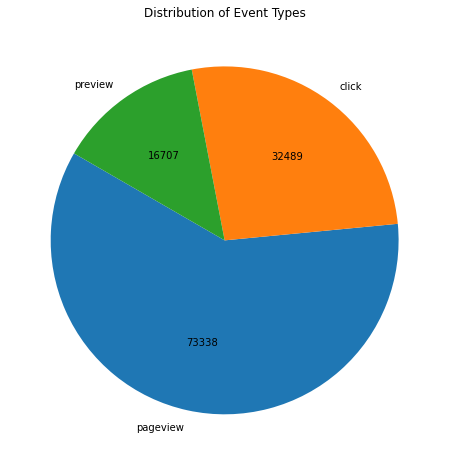

In [34]:
import matplotlib.pyplot as plt

event_counts = df_cleaned['event'].value_counts() #count of each event type
event_labels = event_counts.index # event type labels return in the form of 1-D array
event_values = event_counts.values  # returns the total count of values present for each event label in 1-D Array

plt.figure(figsize=(8,8))
plt.pie(event_values, labels=event_labels, autopct=lambda p: '{:.0f}'.format(p*sum(event_values)/100),startangle=150)

plt.title("Distribution of Event Types")
plt.show()


##  2. Analysis of Other Events

### What is the total count and distribution of other recorded events in the dataset?

In [35]:
total_clicks = df_cleaned[df_cleaned['event']=='click'].shape[0]
total_previews = df_cleaned[df_cleaned['event']=='preview'].shape[0]
total_events = df_cleaned.shape[0]

print(f"Total Clicks: {total_clicks}")
print(f"Total Preview: {total_previews}")
print(f"Toral_events : {total_events}")

Total Clicks: 32489
Total Preview: 16707
Toral_events : 122534


## 3. Geographical Distribution

### Which countries contributed to the pageviews?

In [36]:
geographical_distribution = df_cleaned[df_cleaned['event'] == 'pageview'].groupby('country').size()
print("Geographical Distribution of Pageviews")
print(geographical_distribution)

Geographical Distribution of Pageviews
country
Afghanistan            2
Albania              231
Algeria              328
American Samoa         3
Andorra                2
                    ... 
Wallis and Futuna      1
Yemen                 30
Zambia                49
Zimbabwe              15
Åland                  3
Length: 211, dtype: int64


## 4. Click-Through Rate (CTR) Analysis:

### What is the overall click-through rate (CTR) calculated as clicks/pageviews?
### How does the CTR vary across different links?

In [37]:
overall_CTR = (total_clicks/total_pageviews) if total_pageviews > 0 else 0
print(f"Overall CTR : {overall_CTR:.2f}")

Overall CTR : 0.44


In [38]:
link_click = df_cleaned[df_cleaned['event'] == 'click'].groupby('linkid').size()
link_pageviews = df_cleaned[df_cleaned['event'] == 'pageview'].groupby('linkid').size()
pd.Series(0,index=link_click.index)

linkid
00126b32-0c35-507b-981c-02c80d2aa8e7    0
004b9724-abca-5481-b6e9-6148a7ca00a5    0
0063a982-41cd-5629-96d0-e1c4dd72ea11    0
006af6a0-1f0d-4b0c-93bf-756af9071c06    0
00759b81-3f04-4a61-b934-f8fb3185f4a0    0
                                       ..
ffd8d5a7-91bc-48e1-a692-c26fca8a8ead    0
fff38ca0-8043-50cd-a5f1-f65ebb7105c5    0
fff84c0e-90a1-59d8-9997-adc909d50e16    0
fffc17a7-f935-5d3e-bd3e-d761fd80d479    0
fffd0045-29de-522b-b5d8-35786363bf07    0
Length: 2246, dtype: int64

In [41]:
link_ctr =(link_click / link_pageviews).fillna(0)
print(link_ctr)

linkid
00073307-ae96-5089-a117-4783afb42f8e    0.0
00126b32-0c35-507b-981c-02c80d2aa8e7    1.0
0018cfff-50a1-5984-9715-01ef2d11a49a    0.0
0033934b-5d16-5a06-af58-d087bcdd3680    0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608    0.0
                                       ... 
fff38ca0-8043-50cd-a5f1-f65ebb7105c5    1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7    0.0
fff84c0e-90a1-59d8-9997-adc909d50e16    1.0
fffc17a7-f935-5d3e-bd3e-d761fd80d479    0.5
fffd0045-29de-522b-b5d8-35786363bf07    0.5
Length: 3822, dtype: float64


## Correlation Analysis:
Is there a correlation between clicks and previews on a link? If so, is it statistically significant, and how strong is the effect?


Perform tests for potential relationships and categorical (binary) relationships between the variables.

In [42]:
from scipy.stats import pearsonr

In [44]:
clicks_df = df_cleaned[df_cleaned['event'] == 'click']
previews_df = df_cleaned[df_cleaned['event'] == 'preview']

# Count occurrences of each linkid
clicks_count = clicks_df.groupby('linkid').size()
preview_count = previews_df.groupby('linkid').size()

# Create DataFrames with counts for easy merging
clicks_count_df = clicks_count.rename('clicks').reset_index()
preview_count_df = preview_count.rename('previews').reset_index()

# Merge the DataFrames on 'linkid'
merged_df = pd.merge(clicks_count_df, preview_count_df, on='linkid', how='inner')

# Compute Pearson correlation
correlation, p_value = pearsonr(merged_df['clicks'], merged_df['previews'])

print(f"Correlation between clicks and previews: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation between clicks and previews: 0.970
P-value: 0.000
The correlation is statistically significant.


In [128]:
merged_df

,linkid,clicks,previews
0,006af6a0-1f0d-4b0c-93bf-756af9071c06,6,11
1,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,1
2,00829040-ee01-4409-966d-d67c7965144a,14,9
3,00de7566-f014-4d20-8616-82e4dea45b88,1,1
4,0211bf4d-0e9d-46c2-889c-f97872280820,81,106
...,...,...,...
459,fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1,236,93
460,fe24ad63-e347-40db-8e75-94e573bd3d9b,6,1
461,fe8a3fcd-7beb-4db0-8494-5238e1e1cab3,90,50
462,fe8f7a23-be9d-49a6-b9b5-d26823c3f911,34,19
